In [1]:
%run ~/.python/init.ipynb


In [2]:
from parallel import pmap

In [3]:
path = Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic/')
arrs = [np.load(p)[:, :2] for p in path.glob("coords*npy")]

In [4]:
def plot_trajectory(out, save_path=None):
    fig, ax = plt.subplots(1, 1, dpi=150, figsize=(4, 3))

    for idx, arr in enumerate(arrs[::2]):
        ax = sns.lineplot(x=-arr[::20,0], # plot every 20th
                          y=arr[::20,1], # plot every 20th
                          sort=False,
                          color='gray',
                          alpha=0.5,
                          lw=0.5,
                          ax=ax,
                          legend=False,
                         )

    x, y = out[:, 0], out[:,1]
    
    ax = sns.scatterplot(
        x=-x,
        y=y,
        ax=ax,
        markers=False,
        label="location",
        legend=True)
    
    xlim = (-410, 10)
    ylim = (-10, 350)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

    plt.axis('off')
    plt.legend(loc='upper right')
    
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, format='jpg')
        plt.close(fig)
    else:
        plt.show()
    

In [5]:
! ls /ubc/cs/research/plai-scratch/video-diffusion-shared/long-videos/carla_80_hierarchy-2

config.json	      video_25.npy  video_42.npy  video_5.npy	video_77.npy
video_0.npy	      video_26.npy  video_43.npy  video_60.npy	video_78.npy
video_0_with_map.gif  video_27.npy  video_44.npy  video_61.npy	video_79.npy
video_10.npy	      video_28.npy  video_45.npy  video_62.npy	video_7.npy
video_11.npy	      video_29.npy  video_46.npy  video_63.npy	video_80.npy
video_12.npy	      video_2.npy   video_47.npy  video_64.npy	video_81.npy
video_13.npy	      video_30.npy  video_48.npy  video_65.npy	video_82.npy
video_14.npy	      video_31.npy  video_49.npy  video_66.npy	video_83.npy
video_15.npy	      video_32.npy  video_4.npy   video_67.npy	video_84.npy
video_16.npy	      video_33.npy  video_50.npy  video_68.npy	video_85.npy
video_17.npy	      video_34.npy  video_51.npy  video_69.npy	video_86.npy
video_18.npy	      video_35.npy  video_52.npy  video_6.npy	video_87.npy
video_19.npy	      video_36.npy  video_53.npy  video_70.npy	video_88.npy
video_1.npy	      video_37.npy  video_54.npy  video_7

In [8]:
def pplot(i):
    plot_trajectory(out[[i]], save_path=gif_path / f"{i}.jpg")

all_paths = sorted(Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/long-videos/carla_80_hierarchy-2_predictions/').glob("*npy"))

for p in all_paths[10:20]:
    out = np.load(p)
    gif_path = Path(str(p).replace(".npy", '_scatter'))
    break
#     gif_path.mkdir(parents=True, exist_ok=True)
#     pmap(pplot, range(out.shape[0]))

In [18]:
out = np.load(all_paths[1])
out

array([[221070.73 ,  54901.074],
       [219118.92 ,  54399.99 ],
       [219174.9  ,  54422.8  ],
       [219667.88 ,  54544.99 ],
       [219908.48 ,  54613.055],
       [219555.3  ,  54528.03 ],
       [219296.27 ,  54462.527],
       [219402.64 ,  54487.79 ],
       [219162.36 ,  54427.63 ],
       [218617.56 ,  54285.87 ],
       [219414.2  ,  54482.492],
       [219288.16 ,  54443.71 ],
       [219495.86 ,  54490.855],
       [219187.6  ,  54409.73 ],
       [218393.2  ,  54206.348],
       [219173.23 ,  54386.66 ],
       [218624.98 ,  54254.35 ],
       [218959.58 ,  54335.87 ],
       [219276.2  ,  54422.25 ],
       [219135.05 ,  54386.23 ],
       [219296.6  ,  54435.812],
       [219853.95 ,  54583.105],
       [220211.64 ,  54684.074],
       [220469.61 ,  54748.777],
       [220867.23 ,  54862.004],
       [221064.16 ,  54912.62 ],
       [221164.05 ,  54944.3  ],
       [221433.64 ,  55009.67 ],
       [221708.47 ,  55091.27 ],
       [222675.02 ,  55348.53 ],
       [22

array([[157.16719  ,  18.48367  ],
       [157.15306  ,  18.34545  ],
       [157.26791  ,  18.627052 ],
       [157.35123  ,  17.874231 ],
       [157.46266  ,  17.428965 ],
       [157.88205  ,  17.116867 ],
       [158.12106  ,  17.784906 ],
       [157.94734  ,  18.864922 ],
       [157.9615   ,  16.299534 ],
       [158.82669  ,  17.668962 ],
       [158.12337  ,  16.732231 ],
       [157.88264  ,  16.895073 ],
       [158.05763  ,  15.382566 ],
       [157.72194  ,  15.085648 ],
       [157.32843  ,  14.994033 ],
       [157.34088  ,  14.994987 ],
       [157.53456  ,  14.877904 ],
       [157.70738  ,  14.430718 ],
       [157.93608  ,  14.468261 ],
       [157.92372  ,  14.649756 ],
       [157.75171  ,  14.245003 ],
       [157.49329  ,  13.311379 ],
       [156.86955  ,  10.785454 ],
       [156.80981  ,  11.536682 ],
       [156.85419  ,  11.355676 ],
       [157.06657  ,  11.358477 ],
       [157.38167  ,  11.588091 ],
       [157.73164  ,  10.325767 ],
       [157.87157  ,

In [32]:
gif_path

PosixPath('/ubc/cs/research/plai-scratch/video-diffusion-shared/long-videos/carla_80_hierarchy-2_predictions/video_0_scatter')

In [45]:
all_paths

[PosixPath('sampled_videos/carla-samples/not-goal-directed/autoreg/sample_0004-0_pred.npy')]

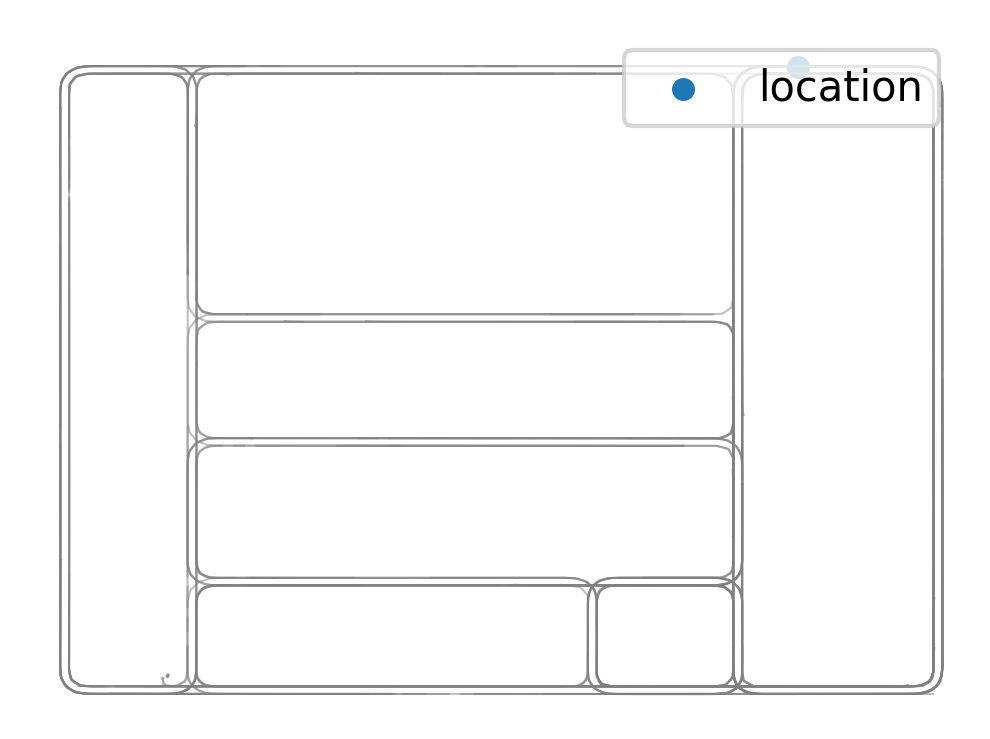

In [30]:
ax = plot_trajectory(out[[0]])

In [35]:
ax.lines[0].get_xdata()

array([-92.39163208, -92.39286041, -92.39250946, -92.3915329 ,
       -92.39070129, -92.38990784, -92.38905334, -92.38729095,
       -92.38738251, -92.38651276, -92.38572693, -92.38491821,
       -92.38406372, -92.38321686, -92.38227081, -92.38223267])

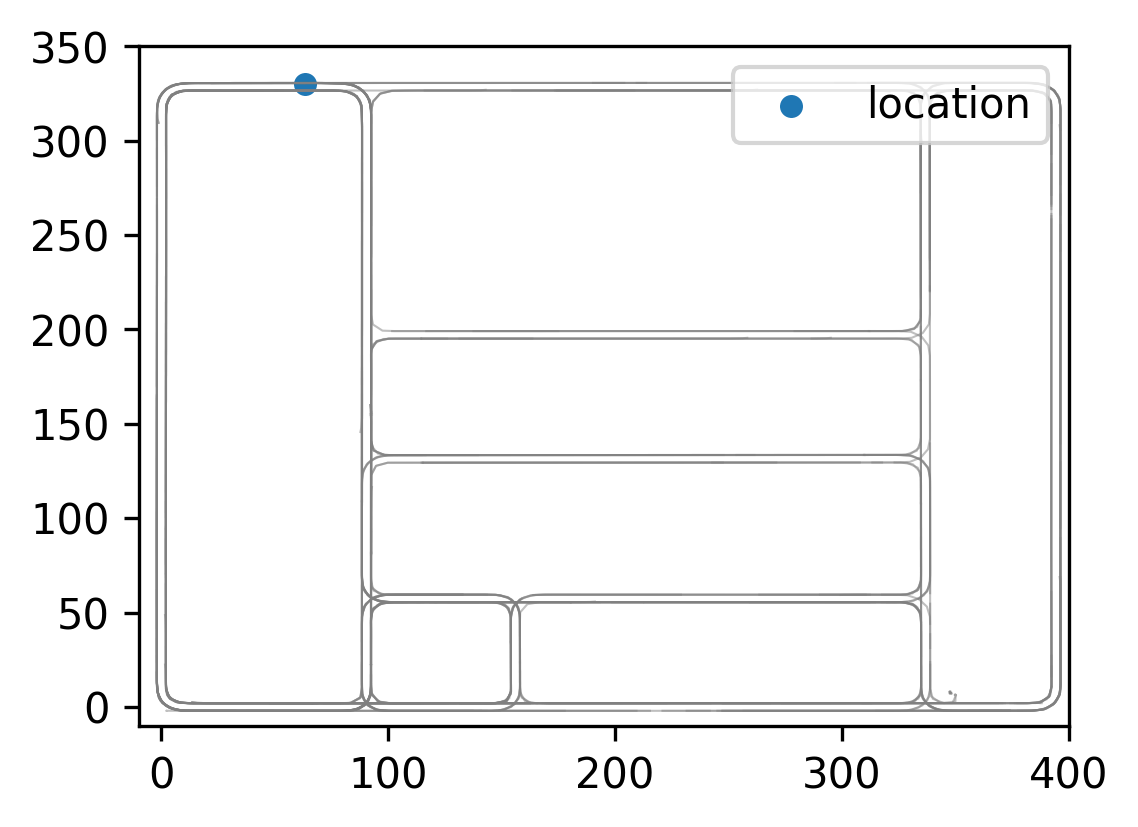

In [12]:
plot_trajectory(out[[0]])